In [117]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import math
import numpy as np
from scipy import interpolate


In [104]:
data_dir = Path('pictures')
paths_to_imgs = list(data_dir.glob('*.bmp'))  # Search for files end with .lsm
paths_to_imgs.sort()
# Read in the first image in the folder
img = Image.open(paths_to_imgs[0])
px = img.load()
width, height = img.size
print(width, height)

640 480


In [105]:
paths_to_imgs

[PosixPath('pictures/1.bmp'),
 PosixPath('pictures/2.bmp'),
 PosixPath('pictures/3.bmp'),
 PosixPath('pictures/4.bmp'),
 PosixPath('pictures/5.bmp'),
 PosixPath('pictures/6.bmp'),
 PosixPath('pictures/7.bmp'),
 PosixPath('pictures/8.bmp'),
 PosixPath('pictures/9.bmp')]

In [106]:
def interpolate_pixels_along_line(x0, y0, x1, y1):

    pixels = []
    steep = abs(y1 - y0) > abs(x1 - x0)

    # Ensure that the path to be interpolated is shallow and from left to right
    if steep:
        t = x0
        x0 = y0
        y0 = t

        t = x1
        x1 = y1
        y1 = t

    if x0 > x1:
        t = x0
        x0 = x1
        x1 = t

        t = y0
        y0 = y1
        y1 = t

    dx = x1 - x0
    dy = y1 - y0
    gradient = dy / dx  # slope

    # Get the first given coordinate and add it to the return list
    x_end = round(x0)
    y_end = y0 + (gradient * (x_end - x0))
    xpxl0 = x_end
    ypxl0 = round(y_end)
    if steep:
        pixels.extend([(ypxl0, xpxl0), (ypxl0 + 1, xpxl0)])
    else:
        pixels.extend([(xpxl0, ypxl0), (xpxl0, ypxl0 + 1)])

    interpolated_y = y_end + gradient

    # Get the second given coordinate to give the main loop a range
    x_end = round(x1)
    y_end = y1 + (gradient * (x_end - x1))
    xpxl1 = x_end
    ypxl1 = round(y_end)

    # Loop between the first x coordinate and the second x coordinate, interpolating the y coordinates
    for x in range(xpxl0 + 1, xpxl1):
        if steep:
            pixels.extend([(math.floor(interpolated_y), x), (math.floor(interpolated_y) + 1, x)])

        else:
            pixels.extend([(x, math.floor(interpolated_y)), (x, math.floor(interpolated_y) + 1)])

        interpolated_y += gradient

    # Add the second given coordinate to the given list
    if steep:
        pixels.extend([(ypxl1, xpxl1), (ypxl1 + 1, xpxl1)])
    else:
        pixels.extend([(xpxl1, ypxl1), (xpxl1, ypxl1 + 1)])

    return pixels[0:-1]
def rgb_to_intensity(r, g, b):
    return (0.21 * r) + (0.72 * g) + (0.07 * b)

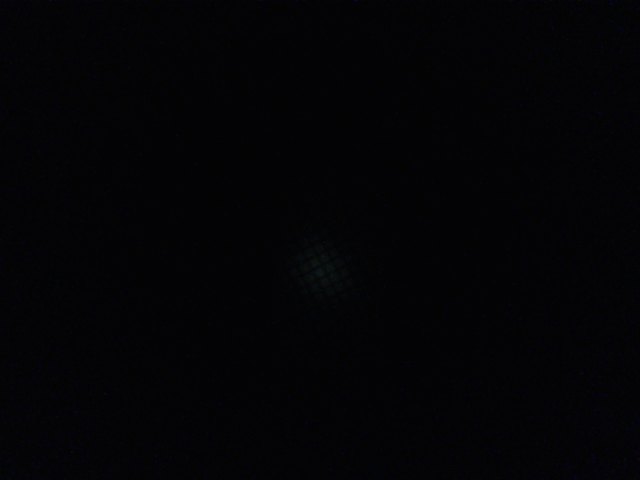

In [107]:
img

In [108]:
integral = 0
f = []
for (x, y) in interpolate_pixels_along_line(260,210,380,330):
    integral += rgb_to_intensity(*px[x, y])
    f.append(rgb_to_intensity(*px[x, y]))
    img.putpixel( (x, y), (255, 0, 0) )

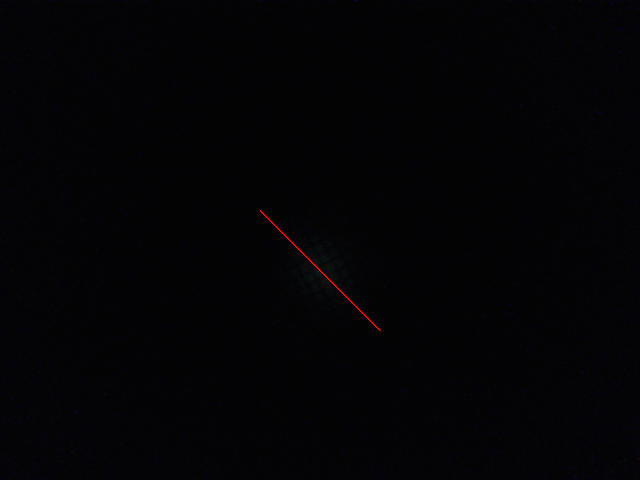

In [109]:
img

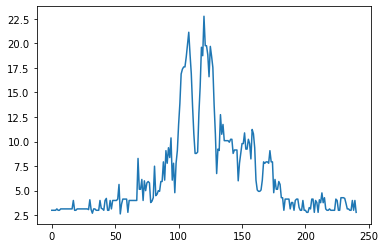

In [110]:
integral
plt.plot(f)

In [111]:
integrals = [0 for x in paths_to_imgs]
fs = [[] for x in paths_to_imgs]
i = 0
integral_line = interpolate_pixels_along_line(260,210,380,330)
for path in paths_to_imgs:
    img = Image.open(path)
    px = img.load()
    for (x, y) in interpolate_pixels_along_line(260,210,380,330):
        integrals[i] += rgb_to_intensity(*px[x, y])
        fs[i].append(rgb_to_intensity(*px[x, y]))
        img.putpixel( (x, y), (255, 0, 0) )
    i += 1

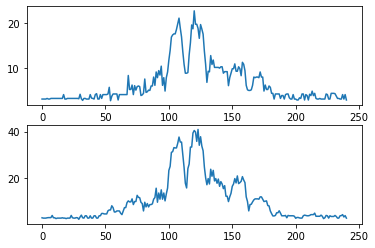

In [112]:
plt.figure()

plt.subplot(211)
plt.plot(fs[0])

plt.subplot(212)
plt.plot(fs[1])

#plt.subplot(419)
#plt.plot(fs[8])

plt.show()

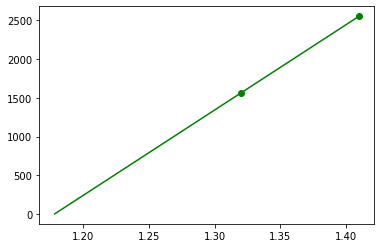

In [175]:
U = [1.32,
1.41]# U мкп
I = [integrals[0], integrals[1]]

model1 = np.poly1d(np.polyfit(U, I, 1))

plt.scatter(U, I, color='green')
U = [np.roots(model1)[0], 1.32,
1.41]
plt.plot(U, model1(U), color='green')

In [176]:
np.roots(model1)[0]

1.1782722745327336

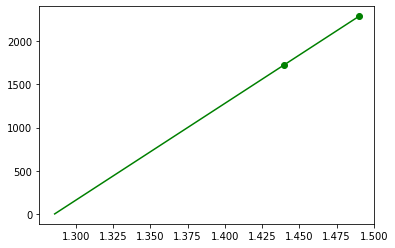

In [177]:
U = [1.44,
1.49]# U мкп
I = [integrals[2], integrals[3]]

model1 = np.poly1d(np.polyfit(U, I, 1))

plt.scatter(U, I, color='green')
U = [np.roots(model1)[0], 1.44,
1.49]
plt.plot(U, model1(U), color='green')

In [178]:
np.roots(model1)[0]

1.2859084023879528

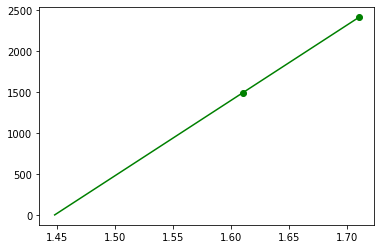

In [179]:
U = [1.61,
1.71]# U мкп
I = [integrals[4], integrals[5]]

model1 = np.poly1d(np.polyfit(U, I, 1))

plt.scatter(U, I, color='green')
U = [np.roots(model1)[0], 1.61,
1.71]
plt.plot(U, model1(U), color='green')

In [180]:
np.roots(model1)[0]

1.4478679343579057

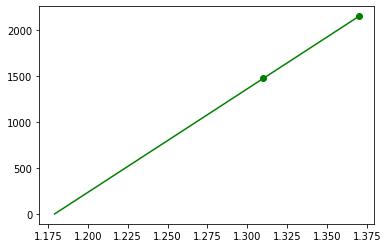

In [181]:
U = [1.31,
1.37]# U мкп
I = [integrals[7], integrals[8]]

model1 = np.poly1d(np.polyfit(U, I, 1))

plt.scatter(U, I, color='green')
U = [np.roots(model1)[0], 1.31,
1.37]
plt.plot(U, model1(U), color='green')

In [182]:
np.roots(model1)[0]

1.1792870444267083

In [174]:
integrals

[1562.0600000000018,
 2553.9999999999977,
 1729.3700000000008,
 2290.5199999999977,
 1493.8200000000015,
 2415.1799999999985,
 1042.0599999999993,
 1474.050000000001,
 2150.669999999998]

In [113]:
U = [1.01, 1.51, 2.02, 2.5, 3, 3.5, 4, 4.25] # U катода
I1 = [0.03, 0.02, 0.04, 0.09, 0.13, 0.16, 0.18, 0.18] # I экрана
I2 = [0.03, 0.03, 0.04, 0.04, 0.05, 0.04, 0.05, 0.05] # I катода

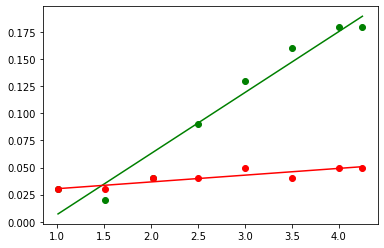

In [114]:
#find line of best fit
model1 = np.poly1d(np.polyfit(U, I1, 1))
model2 = np.poly1d(np.polyfit(U, I2, 1))
#add points to plot
plt.scatter(U, I1, color='green')
plt.plot(U, model1(U), color='green')

plt.scatter(U, I2, color='red')
plt.plot(U, model2(U), color='red')

#add line of best fit to plot
#plt.plot(U, a * U + b)

In [89]:
U = [1.01, 1.25, 1.5, 2, 2.5, 3, 3.51, 3.82] # U экрана
I1 = [0.12,
0.12,
0.13,
0.14,
0.14,
0.15,
0.16,
0.17] # I экрана


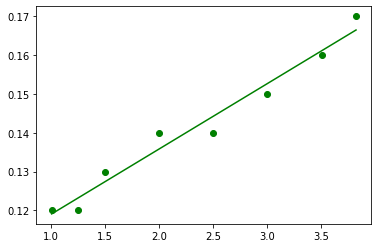

In [90]:
#find line of best fit
model1 = np.poly1d(np.polyfit(U, I1, 1))
#model2 = np.poly1d(np.polyfit(U, I2, 1))
#add points to plot
plt.scatter(U, I1, color='green')
plt.plot(U, model1(U), color='green')

#plt.scatter(U, I2, color='red')
#plt.plot(U, model2(U), color='red')

#add line of best fit to plot
#plt.plot(U, a * U + b)

In [93]:
U = [0.8,
1.1,
1.41,
1.55,
1.7,
1.85,
2] # U мкп
I1 = [3.38,
4.69,
6.1,
6.78,
7.48,
8.22,
8.94] # I мкп
I2 = [0.02,
0.03,
0.03,
0.04,
0.05,
0.08,
0.16] # I экрана

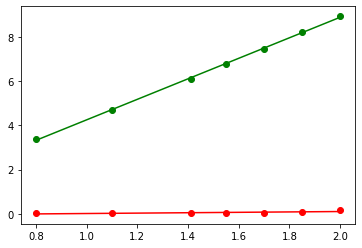

In [95]:
#find line of best fit
model1 = np.poly1d(np.polyfit(U, I1, 1))
model2 = np.poly1d(np.polyfit(U, I2, 1))
#add points to plot
plt.scatter(U, I1, color='green')
plt.plot(U, model1(U), color='green')

plt.scatter(U, I2, color='red')
plt.plot(U, model2(U), color='red')

#add line of best fit to plot
#plt.plot(U, a * U + b)

In [96]:
U = [1.01,
1.25,
1.5,
2,
2.5,
3,
3.5,
4] # U катода
I1 = [0.02,
0.03,
0.03,
0.03,
0.04,
0.04,
0.04,
0.05] # I катода
I2 = [8.99,
9,
9,
9,
9,
9.01,
9.01,
9.01] # I мкп

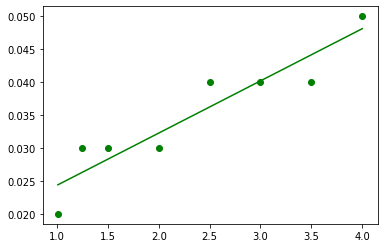

In [98]:
#find line of best fit
model1 = np.poly1d(np.polyfit(U, I1, 1))
model2 = np.poly1d(np.polyfit(U, I2, 1))
#add points to plot
plt.scatter(U, I1, color='green')
plt.plot(U, model1(U), color='green')

#add line of best fit to plot
#plt.plot(U, a * U + b)

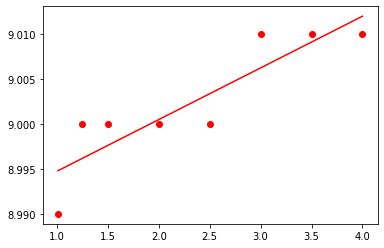

In [99]:
plt.scatter(U, I2, color='red')
plt.plot(U, model2(U), color='red')

In [100]:
U = [0.5,
0.8,
1.1,
1.25,
1.41,
1.7,
1.85,
2] # U мкп
I1 = [2.12,
3.42,
4.73,
5.37,
6.11,
7.5,
8.23,
8.96] # I мкп

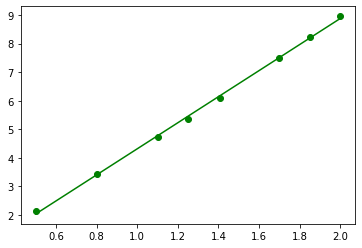

In [101]:
#find line of best fit
model1 = np.poly1d(np.polyfit(U, I1, 1))
model2 = np.poly1d(np.polyfit(U, I2, 1))
#add points to plot
plt.scatter(U, I1, color='green')
plt.plot(U, model1(U), color='green')

#add line of best fit to plot
#plt.plot(U, a * U + b)